In [1]:
import os
import numpy as np

In [8]:
cwd = os.getcwd()
cwd

'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Triple_point_PD'

# Unary phase diagram 

## Mg
<a href="https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439954&Mask=FFF"> Mg Shomate params from NIST </a>

<br>
Cp° = A + B*t + C*t<sup>2</sup> + D*t<sup>3</sup> + E/t<sup>2</sup>
<br>
H° − H°<sub>298.15</sub> = A*t + B*t<sup>2</sup>/2 + C*t<sup>3</sup>/3 + D*t<sup>4</sup>/4 − E/t + F − H
<br>
S° = A*ln(t) + B*t + C*t<sup>2</sup>/2 + D*t<sup>3</sup>/3 − E/(2*t<sup>2</sup>) + G
<br>
    Cp = heat capacity (J/mol*K)
    <br>
    H° = standard enthalpy (kJ/mol)
    <br>
    S° = standard entropy (J/mol*K)
    <br>
    t = temperature (K) / 1000
<br>


In [10]:
species = ['Mg_G', 'Mg_L', 'Mg_S'] # Mg gas, liquid and solid
dG_species = {} # creating the Delta G dictionary
T = np.linspace(300, 2000, 1+int((2000-300)/10)) # numpy array Temperature from 300K to 2000K
T # printing Temperature array

array([ 300.,  310.,  320.,  330.,  340.,  350.,  360.,  370.,  380.,
        390.,  400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,
        480.,  490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,
        570.,  580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,
        660.,  670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,
        750.,  760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,
        840.,  850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,
        930.,  940.,  950.,  960.,  970.,  980.,  990., 1000., 1010.,
       1020., 1030., 1040., 1050., 1060., 1070., 1080., 1090., 1100.,
       1110., 1120., 1130., 1140., 1150., 1160., 1170., 1180., 1190.,
       1200., 1210., 1220., 1230., 1240., 1250., 1260., 1270., 1280.,
       1290., 1300., 1310., 1320., 1330., 1340., 1350., 1360., 1370.,
       1380., 1390., 1400., 1410., 1420., 1430., 1440., 1450., 1460.,
       1470., 1480., 1490., 1500., 1510., 1520., 1530., 1540., 1550.,
       1560., 1570.,

### Calculate dG = dH - TdS

In [19]:
# looping through species list
for tmp_species in species:   
    print ('tmp_species is '+tmp_species)
    t = T/1000 

    tmp_shomate_params = np.zeros(8) # initializing Shomate parameters numpy array with zeros
    # open the text file containing Shomate parameters of the corresponding species
    # opening in read mode
    tmp_file = open(cwd+'/Mg_shomate_para/'+tmp_species+'.txt', 'r') 
    tmp_lines = tmp_file.readlines()
    # looping through lines in the text file (horizontally studying)
    for tmp_line_idx, tmp_line in enumerate(tmp_lines):
        print ('tmp_line_idx is '+str(tmp_line_idx))
        print ('tmp_line is '+tmp_line)
        tmp_shomate_params[tmp_line_idx] = tmp_line.strip().split("\t")[1] # \t is space in the text file
    tmp_file.close()
         
    [A, B, C, D, E, F, G, H] = tmp_shomate_params
    H_298 = H # this is only for pure Mg
    
    dH = H_298 + (A*t) + (B*(t*t)/2) + (C*(t*t*t)/3) + (D*(t*t*t*t)/4) - (E/t) + F - H
    dH = dH*1000 # convert dH from kJ/mol to J/mol
    dS = (A*np.log(t)) + (B*t) + (C*(t*t)/2) + (D*(t*t*t)/3) - (E/(2*t*t)) + G

    dG_species[tmp_species] = dH - (T*dS) # writing the dG values into the dG_species dictionary


tmp_species is Mg_G
tmp_line_idx is 0
tmp_line is A	20.77306

tmp_line_idx is 1
tmp_line is B	0.035592

tmp_line_idx is 2
tmp_line is C	-0.031917

tmp_line_idx is 3
tmp_line is D	0.009109

tmp_line_idx is 4
tmp_line is E	0.000461

tmp_line_idx is 5
tmp_line is F	140.9071

tmp_line_idx is 6
tmp_line is G	173.7799

tmp_line_idx is 7
tmp_line is H	147.1002
tmp_species is Mg_L
tmp_line_idx is 0
tmp_line is A	34.30901

tmp_line_idx is 1
tmp_line is B	-7.471034e-10

tmp_line_idx is 2
tmp_line is C	6.146212e-10

tmp_line_idx is 3
tmp_line is D	-1.598238e-10

tmp_line_idx is 4
tmp_line is E	-1.152011e-11

tmp_line_idx is 5
tmp_line is F	-5.439367

tmp_line_idx is 6
tmp_line is G	75.98311

tmp_line_idx is 7
tmp_line is H	4.790011

tmp_species is Mg_S
tmp_line_idx is 0
tmp_line is A	26.54083

tmp_line_idx is 1
tmp_line is B	-1.533048

tmp_line_idx is 2
tmp_line is C	8.062443

tmp_line_idx is 3
tmp_line is D	0.57217

tmp_line_idx is 4
tmp_line is E	-0.174221

tmp_line_idx is 5
tmp_line is F	-8.50

In [20]:
dG_species

{'Mg_G': array([ 1.02505875e+05,  1.01014684e+05,  9.95167867e+04,  9.80123925e+04,
         9.65016986e+04,  9.49848904e+04,  9.34621426e+04,  9.19336202e+04,
         9.03994793e+04,  8.88598680e+04,  8.73149263e+04,  8.57647878e+04,
         8.42095790e+04,  8.26494208e+04,  8.10844284e+04,  7.95147114e+04,
         7.79403751e+04,  7.63615197e+04,  7.47782415e+04,  7.31906327e+04,
         7.15987815e+04,  7.00027729e+04,  6.84026883e+04,  6.67986062e+04,
         6.51906020e+04,  6.35787483e+04,  6.19631152e+04,  6.03437700e+04,
         5.87207780e+04,  5.70942020e+04,  5.54641027e+04,  5.38305389e+04,
         5.21935674e+04,  5.05532431e+04,  4.89096193e+04,  4.72627475e+04,
         4.56126777e+04,  4.39594583e+04,  4.23031364e+04,  4.06437575e+04,
         3.89813660e+04,  3.73160049e+04,  3.56477161e+04,  3.39765402e+04,
         3.23025167e+04,  3.06256841e+04,  2.89460800e+04,  2.72637407e+04,
         2.55787017e+04,  2.38909978e+04,  2.22006626e+04,  2.05077290e+04,
    

# Plotting \Delta G of species w.r.t temperature

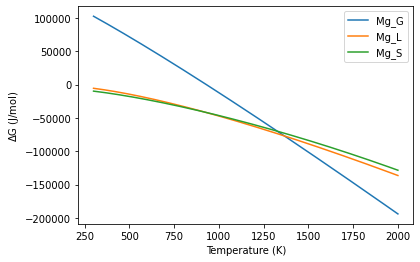

In [21]:
import matplotlib.pyplot as plt
for tmp_species in species:
    plt.plot(T, dG_species[tmp_species], label = tmp_species)    
    
plt.legend()
plt.ylabel('$\Delta$G (J/mol)')
plt.xlabel('Temperature (K)')
plt.show()

In [35]:
dG_2D_arr = np.array([tmp_arr for tmp_arr in dG_species.values()])
min_dG = dG_2D_arr[0,:] == np.amin(dG_2D_arr, axis=0)
min_dG
#dG_2D_arr.shape

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
dG_2D_arr

array([[ 1.02505875e+05,  1.01014684e+05,  9.95167867e+04,
         9.80123925e+04,  9.65016986e+04,  9.49848904e+04,
         9.34621426e+04,  9.19336202e+04,  9.03994793e+04,
         8.88598680e+04,  8.73149263e+04,  8.57647878e+04,
         8.42095790e+04,  8.26494208e+04,  8.10844284e+04,
         7.95147114e+04,  7.79403751e+04,  7.63615197e+04,
         7.47782415e+04,  7.31906327e+04,  7.15987815e+04,
         7.00027729e+04,  6.84026883e+04,  6.67986062e+04,
         6.51906020e+04,  6.35787483e+04,  6.19631152e+04,
         6.03437700e+04,  5.87207780e+04,  5.70942020e+04,
         5.54641027e+04,  5.38305389e+04,  5.21935674e+04,
         5.05532431e+04,  4.89096193e+04,  4.72627475e+04,
         4.56126777e+04,  4.39594583e+04,  4.23031364e+04,
         4.06437575e+04,  3.89813660e+04,  3.73160049e+04,
         3.56477161e+04,  3.39765402e+04,  3.23025167e+04,
         3.06256841e+04,  2.89460800e+04,  2.72637407e+04,
         2.55787017e+04,  2.38909978e+04,  2.22006626e+0

In [33]:
# Creating a function called "plot_stable_phase_wrt_T"
def plot_stable_phase_wrt_T(fill2zero=True):
    dG = np.array([tmp_arr for tmp_arr in dG_species.values()]) 
    # looping through species
    for i, name in enumerate(species):
        # column wise checking which species has minimum dG for a particular temperature
        min_dG = dG[i,:] == np.amin(dG, axis=0) # axis = 0 finding the minimum for all the columns by comparing the rows
        if np.any(min_dG == True):
            plt.plot(T, dG[i,:], label = name)
            if fill2zero:
                plt.fill_between(T, np.min(dG), dG[i,:], where= dG[i,:] <= np.amin(dG, axis=0), color='white', edgecolor="black")
                plt.fill_between(T, np.min(dG), dG[i,:], where= dG[i,:] <= np.amin(dG, axis=0), alpha = 0.5)
        else:
            plt.plot(T, dG[i,:], c=((0.8,0.8,0.8,1)), zorder = 0)
        plt.xlim((np.min(T),np.max(T)))
        plt.ylim((np.min(dG),np.max(dG)))
    plt.xlabel("T (K)]")
    plt.ylabel("$\Delta$G (J/mol)")
    plt.legend()    

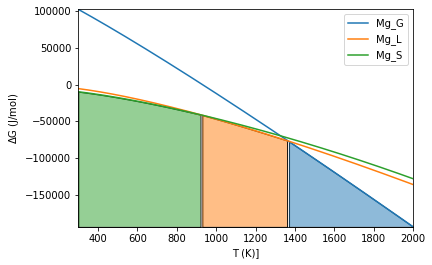

In [34]:
plot_stable_phase_wrt_T(fill2zero=True)